1. Configuración inicial

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

2. Definición del sistema de Lorenz

In [24]:
def lorenz_system(t, state, sigma, rho, beta):
    """
    Define las ecuaciones del sistema de Lorenz
    Args:
        t: tiempo (no se usa explícitamente en ecuaciones autónomas)
        state: vector de estado [x, y, z]
        sigma, rho, beta: parámetros del sistema
    Returns:
        derivadas [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

3. Implementación del Método de Euler

In [25]:
def euler_method(f, initial_state, t0, tf, dt, params):
    """
    Implementación del método de Euler
    Args:
        f: función que define el sistema de ecuaciones
        initial_state: condiciones iniciales [x0, y0, z0]
        t0: tiempo inicial
        tf: tiempo final
        dt: paso de tiempo
        params: parámetros del sistema [sigma, rho, beta]
    Returns:
        t: array de tiempos
        states: array de estados en cada tiempo
    """
    # Inicialización
    n_steps = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, n_steps)
    states = np.zeros((n_steps, 3))
    states[0] = initial_state
    
    # Iteración de Euler
    for i in range(n_steps - 1):
        states[i+1] = states[i] + dt * f(t[i], states[i], *params)
    
    return t, states

4. Implementación del Método de Runge-Kutta 4 (RK4)

In [26]:
def rk4_method(f, initial_state, t0, tf, dt, params):
    """
    Implementación del método de Runge-Kutta de 4to orden
    Args:
        f: función que define el sistema de ecuaciones
        initial_state: condiciones iniciales [x0, y0, z0]
        t0: tiempo inicial
        tf: tiempo final
        dt: paso de tiempo
        params: parámetros del sistema [sigma, rho, beta]
    Returns:
        t: array de tiempos
        states: array de estados en cada tiempo
    """
    # Inicialización
    n_steps = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, n_steps)
    states = np.zeros((n_steps, 3))
    states[0] = initial_state
    
    # Iteración RK4
    for i in range(n_steps - 1):
        k1 = dt * f(t[i], states[i], *params)
        k2 = dt * f(t[i] + dt/2, states[i] + k1/2, *params)
        k3 = dt * f(t[i] + dt/2, states[i] + k2/2, *params)
        k4 = dt * f(t[i] + dt, states[i] + k3, *params)
        
        states[i+1] = states[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, states

5. Simulación para un caso específico

In [27]:
# Parámetros y condiciones iniciales (primer caso del proyecto)
sigma, rho, beta = 10, 28, 8/3
initial_state = np.array([1.0, 1.0, 1.0])  # x0, y0, z0

# Configuración temporal
t0, tf, dt = 0, 50, 0.01

# Ejecutar ambos métodos
t_euler, states_euler = euler_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))
t_rk4, states_rk4 = rk4_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))

6. Visualización de resultados

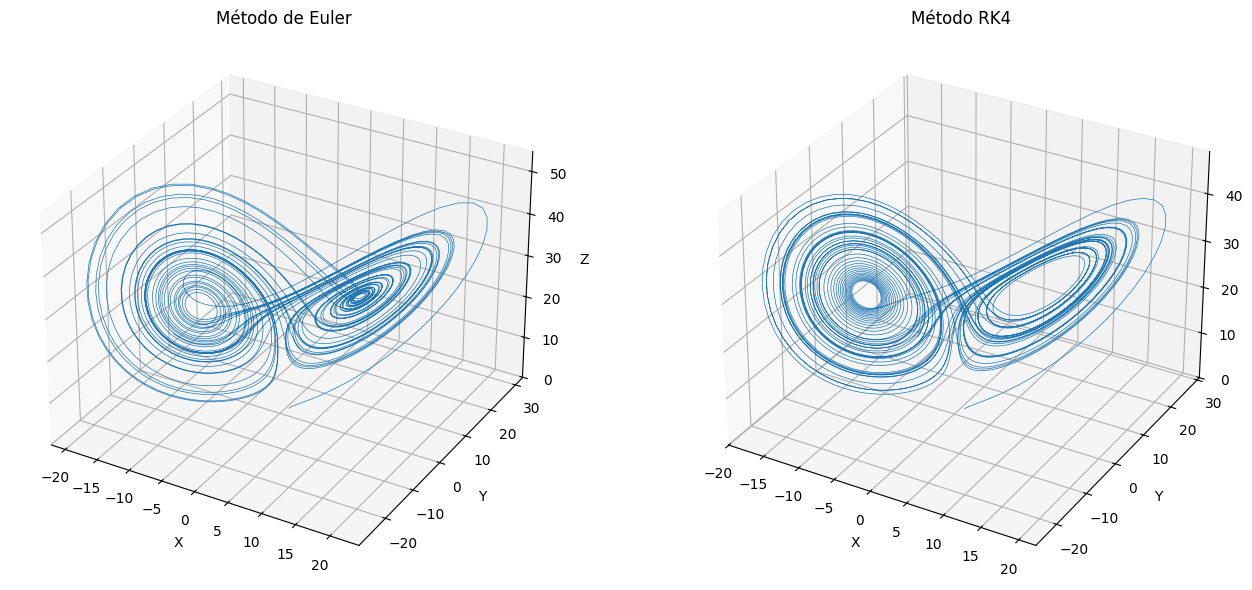

In [28]:
# Gráficas de las trayectorias en 3D
fig = plt.figure(figsize=(14, 6))

# Método de Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(states_euler[:, 0], states_euler[:, 1], states_euler[:, 2], lw=0.5)
ax1.set_title("Método de Euler")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Método RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], lw=0.5)
ax2.set_title("Método RK4")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

7. Comparación de métodos (gráficas temporales)

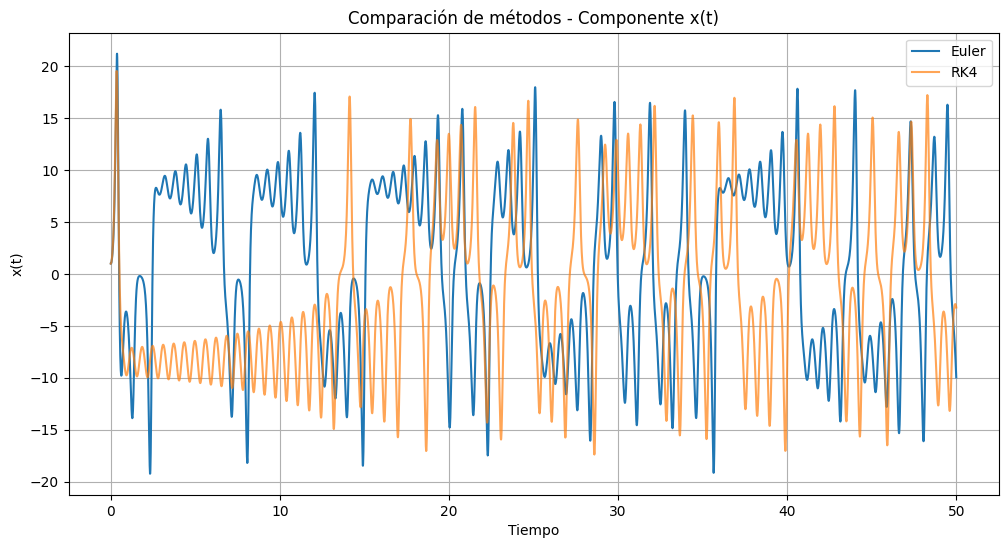

In [29]:
# Comparación de las componentes x(t)
plt.figure(figsize=(12, 6))
plt.plot(t_euler, states_euler[:, 0], label="Euler")
plt.plot(t_rk4, states_rk4[:, 0], label="RK4", alpha=0.7)
plt.title("Comparación de métodos - Componente x(t)")
plt.xlabel("Tiempo")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()

8. Animación 3D

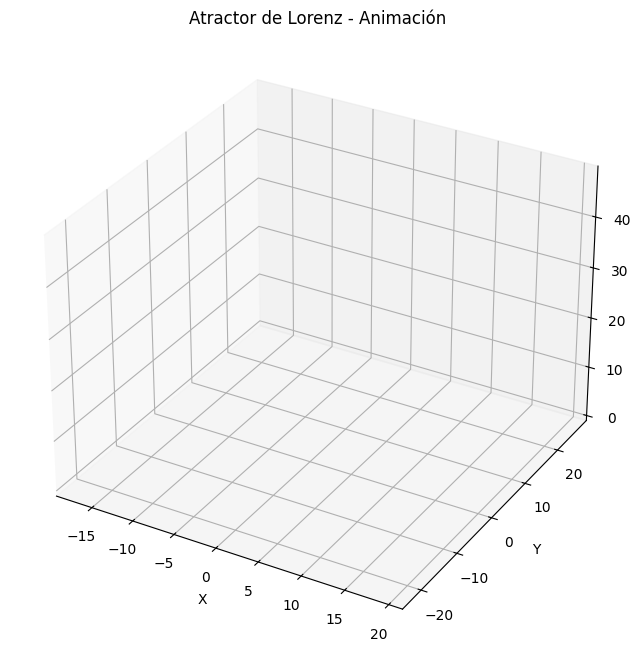

Animación guardada como GIF


In [32]:
# Limpiar todas las figuras previas
plt.close('all')

# Configuración de la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Preparar datos (usaremos RK4 para la animación)
x, y, z = states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2]

# Reducir el número de puntos para mejor rendimiento
step = 20  # Tomar un punto cada 20 para la animación
x_plot = x[::step]
y_plot = y[::step]
z_plot = z[::step]

# Configurar límites
margin = 2
ax.set_xlim([min(x) - margin, max(x) + margin])
ax.set_ylim([min(y) - margin, max(y) + margin])
ax.set_zlim([min(z) - margin, max(z) + margin])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Animación")

# Crear la línea inicial
line = ax.plot([], [], [], lw=1, color='blue')[0]
point = ax.plot([], [], [], 'ro', markersize=8)[0]

def update(frame):
    # Actualizar datos hasta el frame actual
    line.set_data(x_plot[:frame], y_plot[:frame])
    line.set_3d_properties(z_plot[:frame])
    
    # Actualizar punto actual
    point.set_data([x_plot[frame]], [y_plot[frame]])
    point.set_3d_properties([z_plot[frame]])
    
    # Rotar la vista para mejor visualización
    ax.view_init(30, frame/2)
    
    return line, point

# Crear la animación
n_frames = len(x_plot)
anim = FuncAnimation(fig, update, 
                    frames=n_frames,
                    interval=50,  # 50ms entre frames
                    blit=False,
                    repeat=True)

# Mostrar la animación
plt.show()

# Guardar la animación como GIF
try:
    anim.save('lorenz_animation.gif', writer='pillow')
    print("Animación guardada como GIF")
except Exception as e:
    print(f"Error al guardar la animación: {e}")